In [242]:
install.packages("tidyverse")
install.packages("reshape2")
install.packages("plotly")
install.packages("ggplot2")

library(tidyverse)
library(reshape2)
library(plotly)
library(ggplot2)

Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'reshape2' is in use and will not be installed"
Warning message:
"package 'plotly' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"


In [243]:
install.packages("scales")
library(scales)
install.packages("dplyr")
library(dplyr)


Warning message:
"package 'scales' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"


In [244]:
heartData = "data/heart_2020_cleaned.csv"
heartDF = read.csv(heartData, header = TRUE,stringsAsFactors = FALSE)
head(heartDF)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
2,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
3,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
4,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
5,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
6,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No


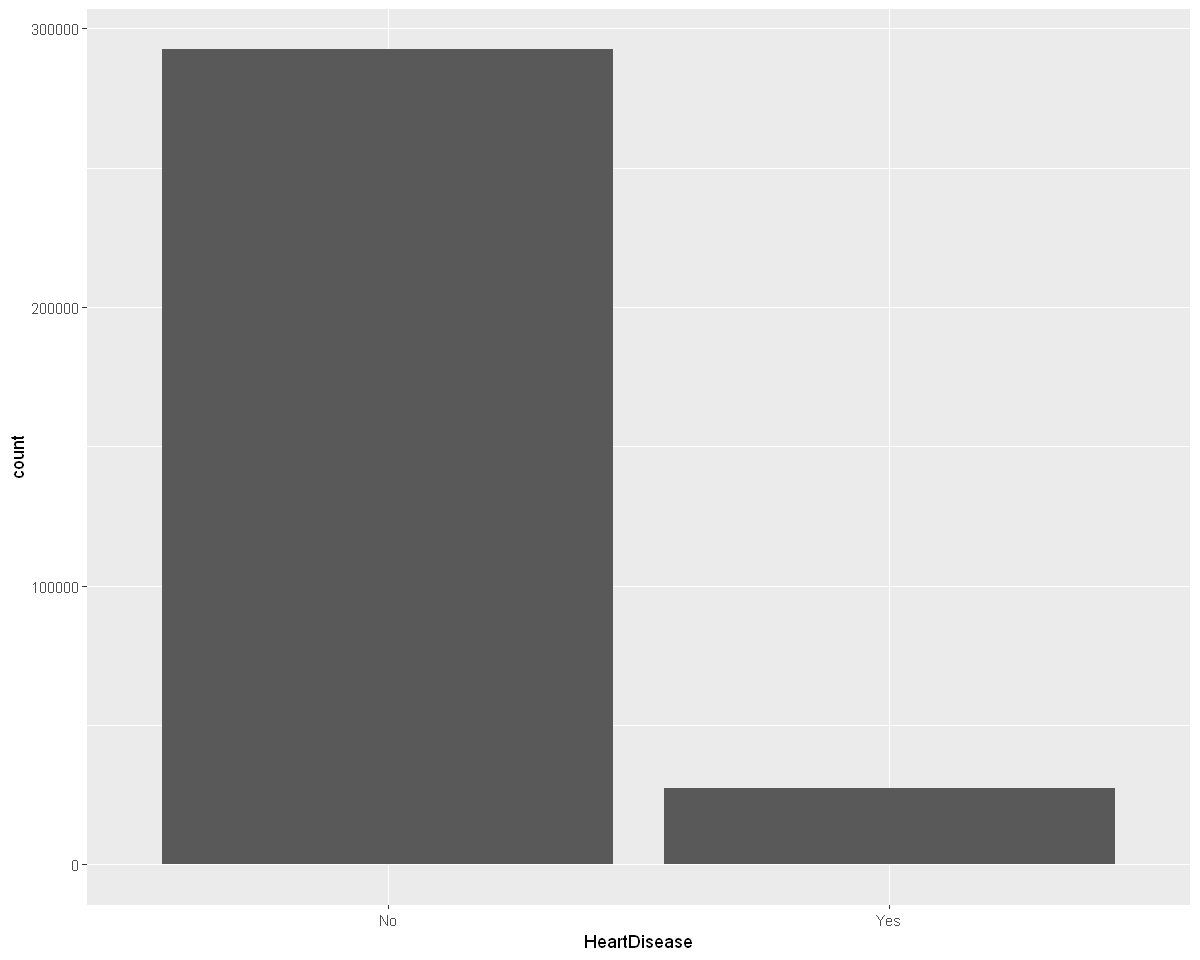

In [245]:
options(scipen=999)
options(repr.plot.width=10, repr.plot.height=8)
#make a bar chart for the number of people with heart disease
graph <- ggplot(heartDF, aes(x = HeartDisease)) +
  geom_bar() +
  labs(title = "Number of people with heart disease" +
  scale_x_continuous(labels = function(x) format(x, scientific = FALSE)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
  )
graph

In [246]:
#only keep the rows where heartDisease is yes
heartDF = heartDF[heartDF$HeartDisease == "Yes",]
#reset the index
row.names(heartDF) = seq(1, nrow(heartDF))
tail(heartDF)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
27368,Yes,29.43,No,No,No,7,0,Yes,Male,45-49,Hispanic,No,Yes,Good,6,Yes,No,No
27369,Yes,38.45,No,No,Yes,30,15,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6,Yes,No,No
27370,Yes,36.21,Yes,No,No,0,0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8,No,No,No
27371,Yes,37.12,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,7,No,No,No
27372,Yes,33.20,Yes,No,No,0,0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8,Yes,No,No
27373,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No


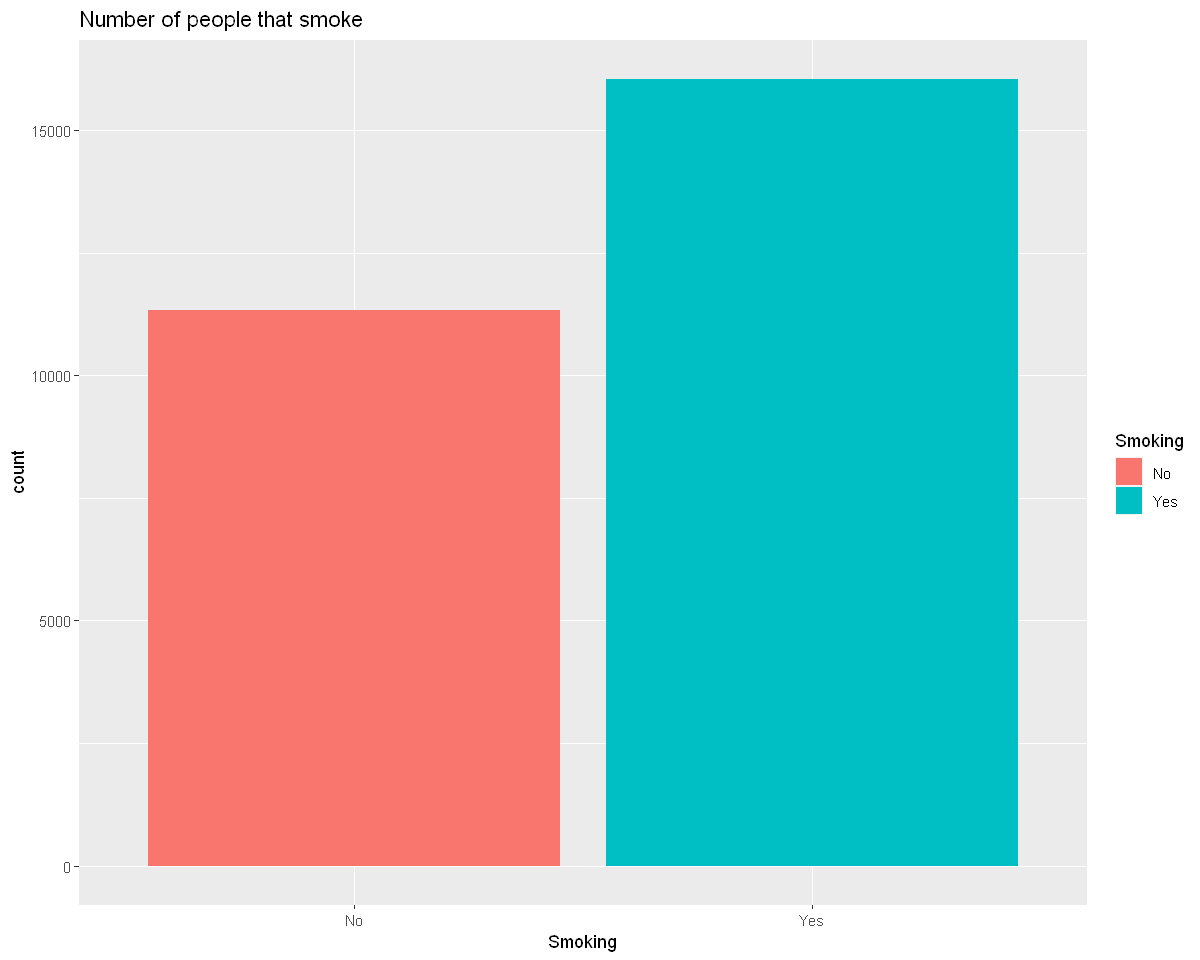

In [247]:
#graph for people that smoke 
graph <- ggplot(heartDF, aes(x = Smoking, fill = Smoking)) +
  geom_bar() +
  labs(title = "Number of people that smoke" )
graph


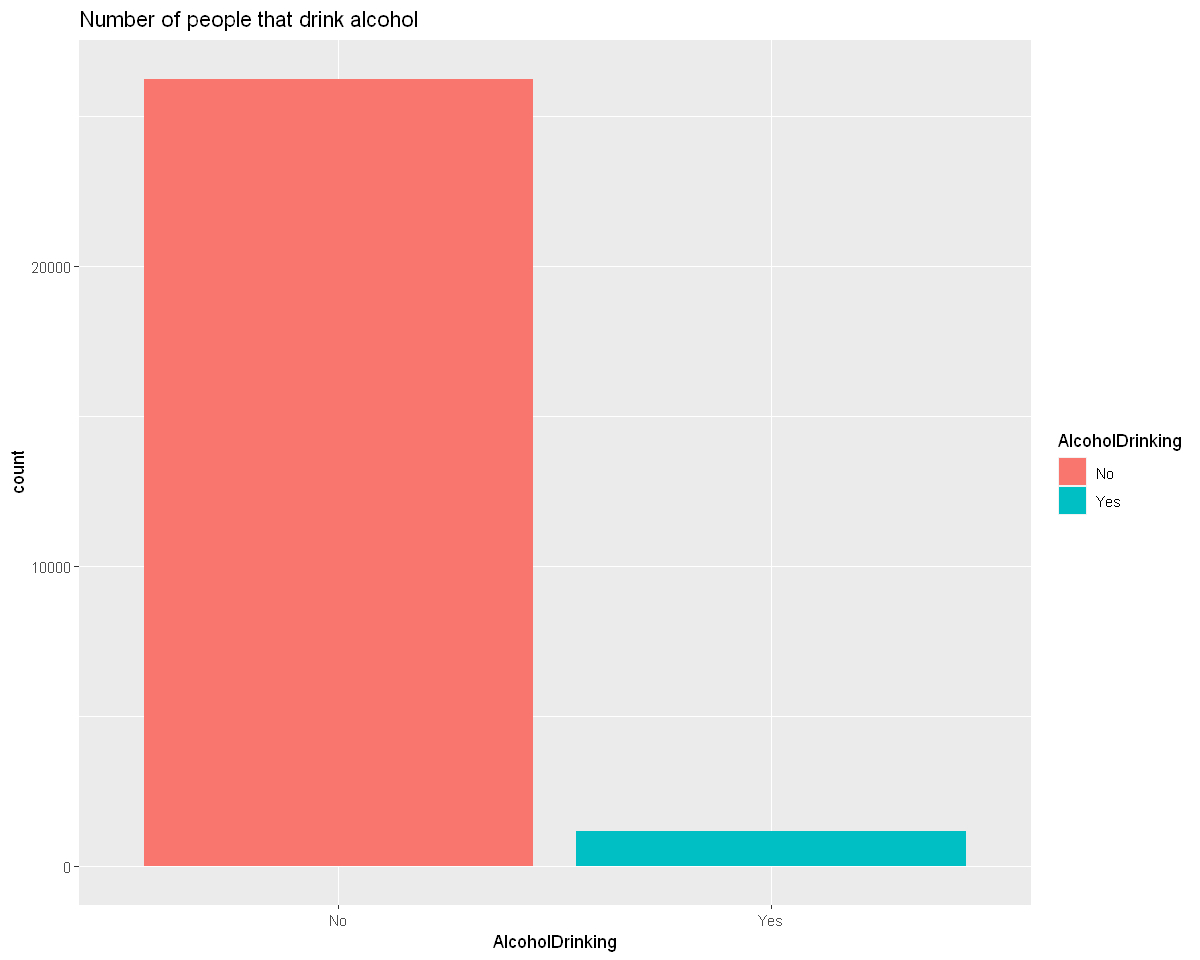

In [248]:
#graph for people that drink alcohol
graph <- ggplot(heartDF, aes(x = AlcoholDrinking, fill = AlcoholDrinking)) +
  geom_bar() +
  labs(title = "Number of people that drink alcohol"
  )
graph

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_range
,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No,overweight
2,Yes,34.30,Yes,No,No,30,0,Yes,Male,60-64,White,Yes,No,Poor,15,Yes,No,No,obese
3,Yes,32.98,Yes,No,Yes,10,0,Yes,Male,75-79,White,Yes,Yes,Poor,4,No,No,Yes,obese
4,Yes,25.06,No,No,No,0,0,Yes,Female,80 or older,White,Yes,No,Good,7,No,No,Yes,overweight
5,Yes,30.23,Yes,No,No,6,2,Yes,Female,75-79,White,Yes,Yes,Fair,8,No,Yes,No,obese
6,Yes,20.37,Yes,No,No,3,0,No,Female,70-74,White,No,No,Poor,10,No,No,No,normal


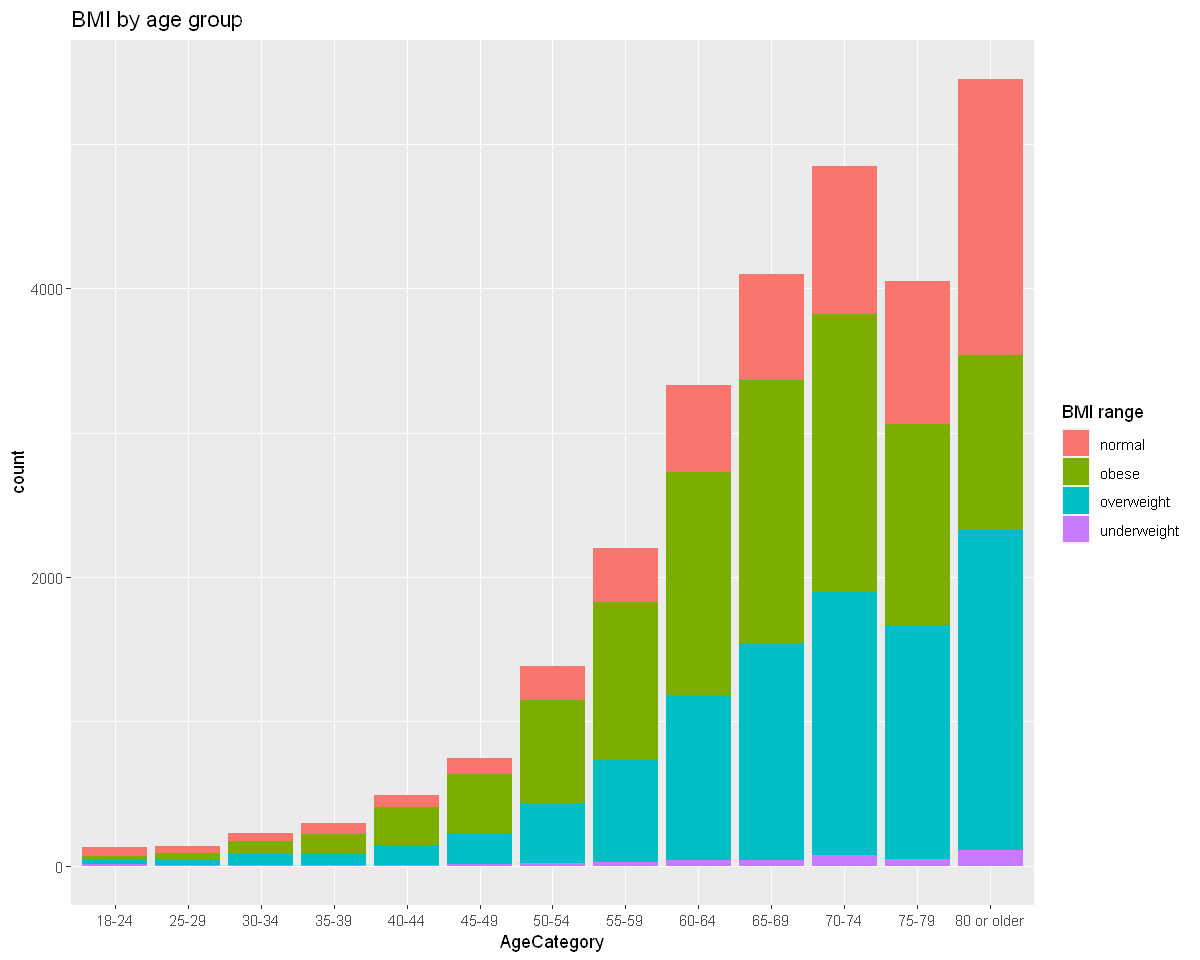

In [249]:
#add a new column for the BMI range, based on the BMI value, if below 18.5 then underweight, if between 18.5 and 25 then normal, if between 25 and 30 then overweight, if above 30 then obese
heartDF$BMI_range = ifelse(heartDF$BMI < 18.5, "underweight", ifelse(heartDF$BMI < 25, "normal", ifelse(heartDF$BMI < 30, "overweight", "obese")))
head(heartDF)

#create a bar chart for bmi for the different age groups 
graph <- ggplot(heartDF, aes(x = AgeCategory, fill = BMI_range)) +
  geom_bar() +
  labs(title = "BMI by age group") +
  scale_fill_discrete(name = "BMI range")
graph


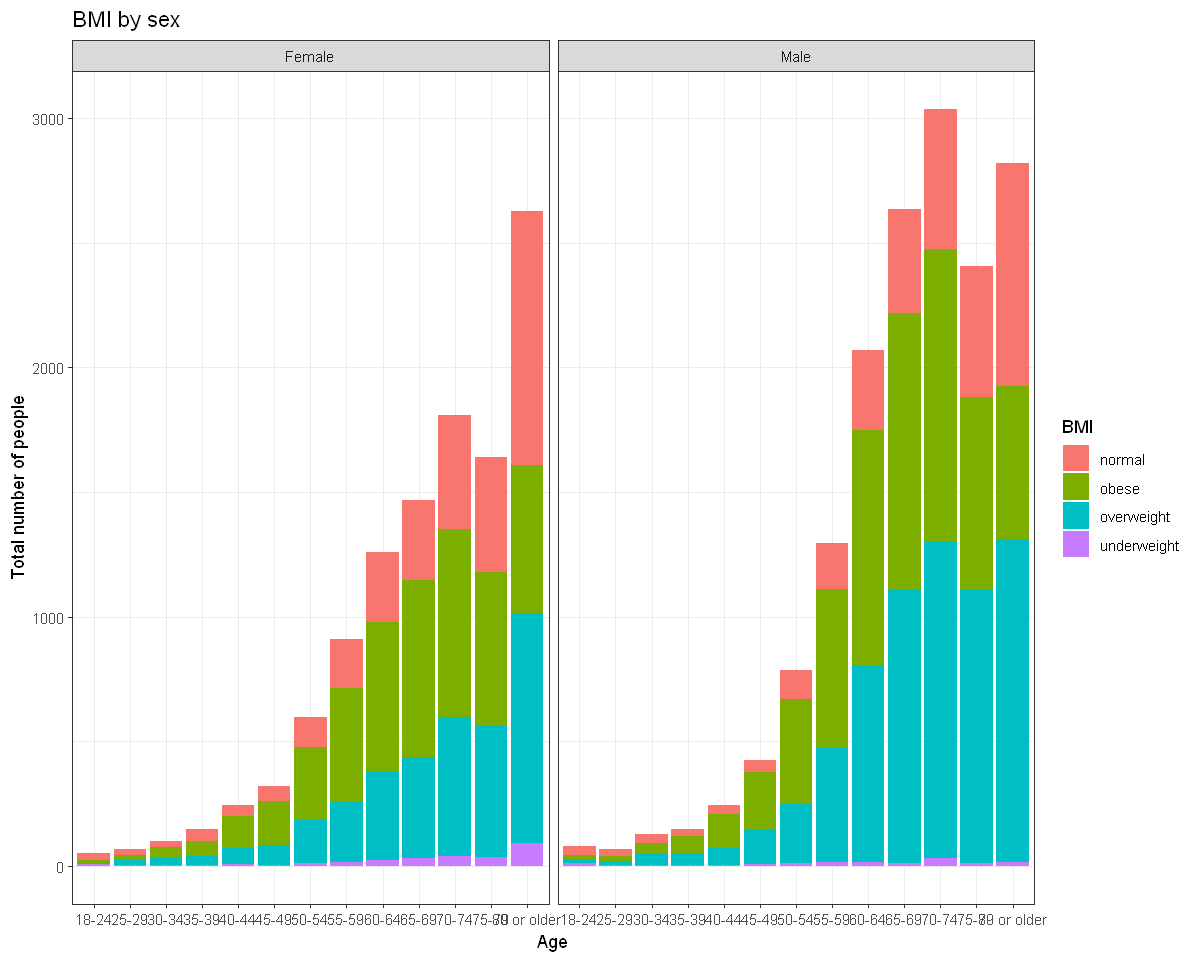

In [252]:
ggplot(heartDF, aes(x = AgeCategory, fill = BMI_range)) +
  theme_bw() +
  facet_wrap(~Sex) +
  geom_bar() +
  labs(y = "Total number of people",
       x = "Age",
       fill = "BMI ",
       title = "BMI by sex")